# Plot bandpassed 3C signals of the entire array for the purpose of visualizing the deep harmonic tremors

In [35]:
# Import modules
from scipy.signal import hilbert
from obspy import read, UTCDateTime, Stream
from matplotlib.pyplot import figure, subplots
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from numpy import abs, mean, amin, amax
from pandas import read_csv, Timestamp, Timedelta, to_datetime
from os.path import join

from utils_basic import ROOTDIR_GEO, GEO_STATIONS, GEO_COMPONENTS, days_to_timestamps, save_figure
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_plot import plot_3c_seismograms

In [36]:
# Inputs
rootdir = ROOTDIR_GEO
starttime = Timestamp("2020-01-13T20:00:45Z")
dur = 30 # Duration in seconds

freqmin = 40.0
freqmax = 75.0

scale = 1e-2 # Scale factor for plotting

linewidth = 0.1

xdim_per_comp = 7
ydim_per_sta = 0.3

scale_bar_amp = 50

In [37]:
# Read and filter the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, freqmin, freqmax)

Could not find A12.GHZ
Could not find A12.GH1
Could not find A12.GH2
Could not find A18.GH1


Text(0.5, 0.93, '40-75 Hz')

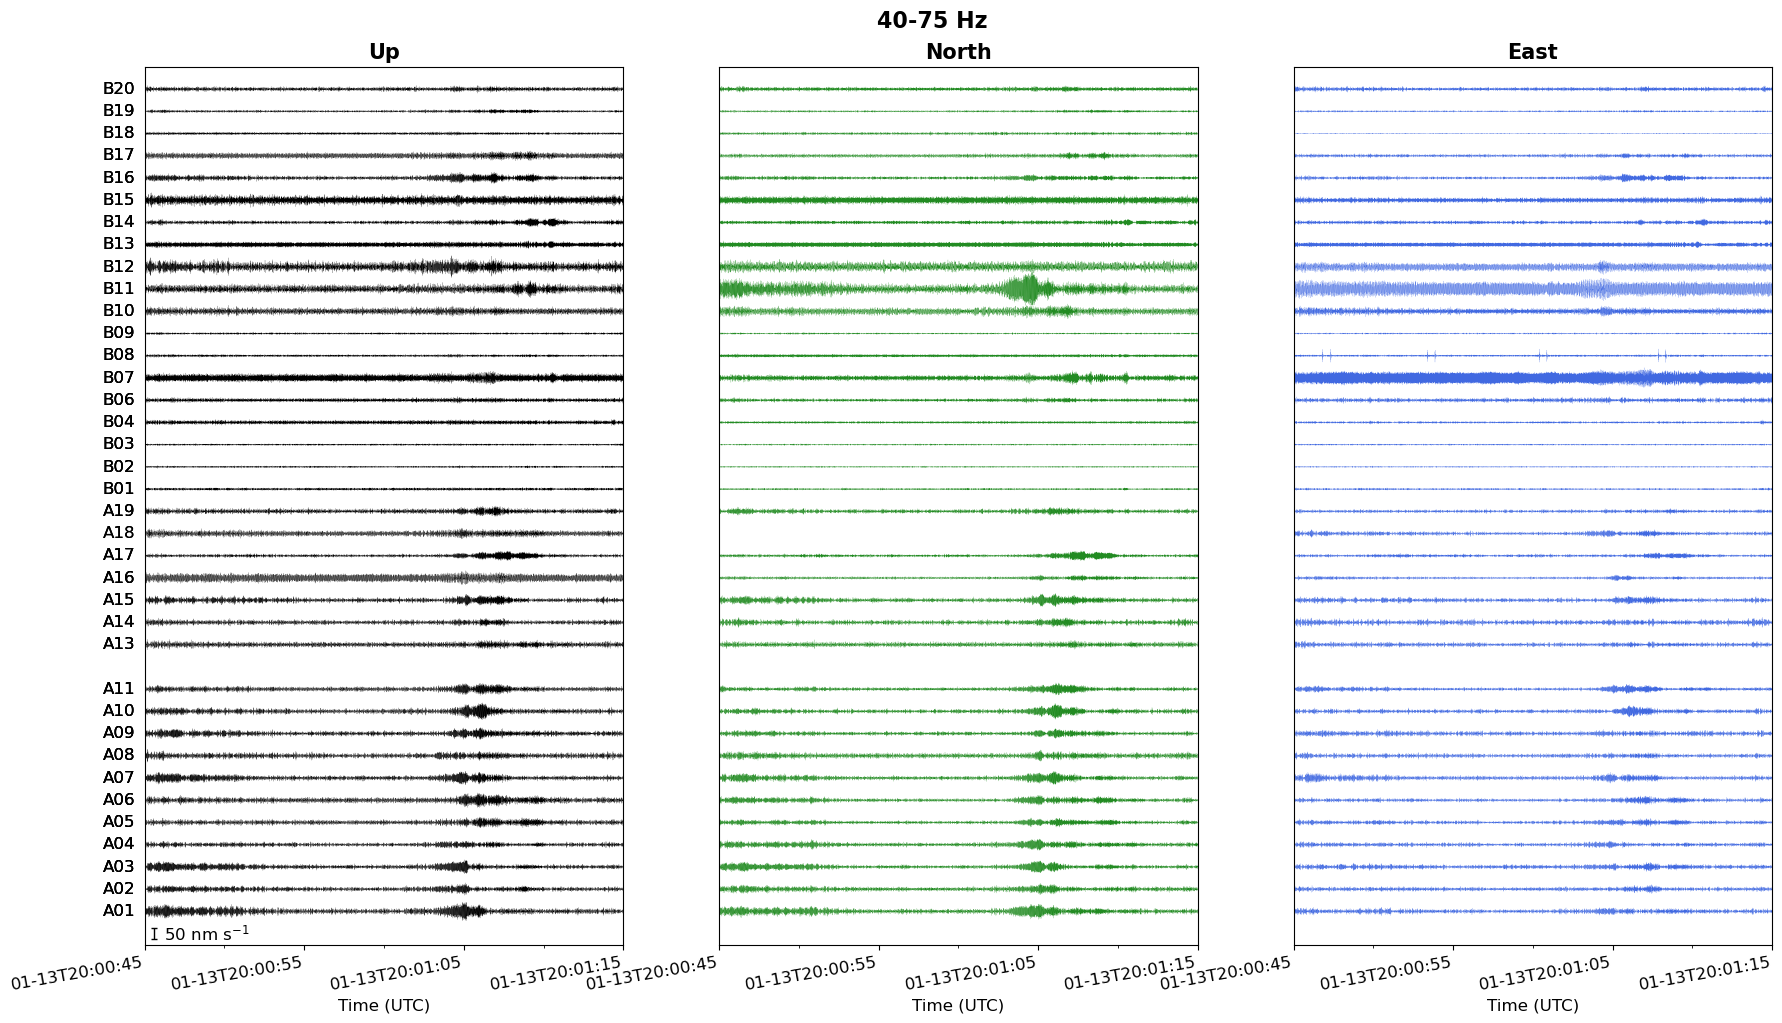

In [38]:
fig, axes = plot_3c_seismograms(stream,  xdim_per_comp=xdim_per_comp, ydim_per_sta=ydim_per_sta, scale=scale, linewidth=linewidth, scale_bar_amp=scale_bar_amp, major_tick_spacing=10, minor_tick_spacing=5)
fig.suptitle(f"{freqmin:.0f}-{freqmax:.0f} Hz", fontsize=16, fontweight="bold", y=0.93)

In [39]:
## Save the figure
timestr = starttime.strftime("%Y-%m-%d-%H-%M-%Ss")


figname = f"sample_bp_waveforms_whole_array_{timestr}_dur{dur:.0f}s_{freqmin:.0f}to{freqmax:.0f}hz.png"
save_figure(fig, figname, outdir=rootdir)

Figure saved to /Volumes/OmanData/data/geophones/sample_bp_waveforms_whole_array_2020-01-13-20-00-45s_dur30s_40to75hz.png
